In [43]:
from utils import *
from fastai.vision.all import *
import zipfile

In [6]:
doc(URLs)

In [4]:
doc(file_extract)

In [55]:
fname = './datasets/covid19-radiography-database.zip'

In [56]:
path = Path(fname)
dest = path.parent

In [57]:
zipfile.ZipFile(path).extractall(dest)

In [62]:
image_path = Path('./datasets/COVID-19 Radiography Database/')

In [63]:
fnames = get_image_files(image_path)

In [64]:
fnames[:5]

(#5) [Path('datasets/COVID-19 Radiography Database/COVID-19/COVID-19 (1).png'),Path('datasets/COVID-19 Radiography Database/COVID-19/COVID-19 (10).png'),Path('datasets/COVID-19 Radiography Database/COVID-19/COVID-19 (100).png'),Path('datasets/COVID-19 Radiography Database/COVID-19/COVID-19 (101).png'),Path('datasets/COVID-19 Radiography Database/COVID-19/COVID-19 (102).png')]

In [70]:
def label_func(x): return x.parent.name
dls = ImageDataLoaders.from_path_func(image_path, fnames, label_func, valid_pct=0.2, seed=42, bs=32, item_tfms=Resize(224))

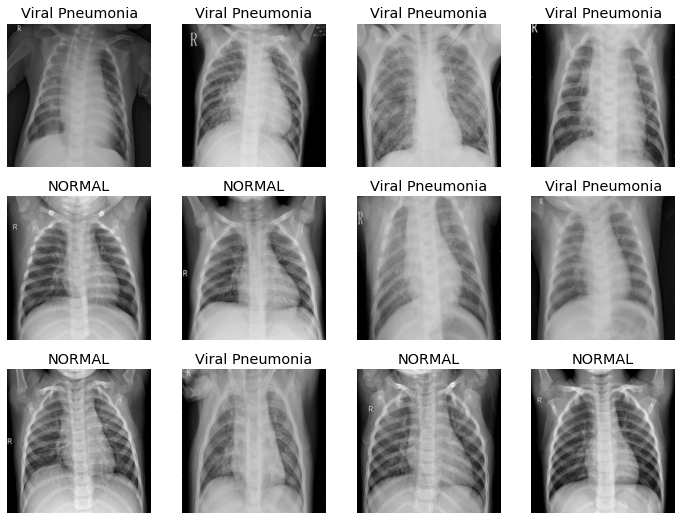

In [73]:
dls.valid.show_batch(max_n=12, nrows=3)

In [71]:
learn = cnn_learner(dls, resnet18, metrics=error_rate)
learn.fine_tune(4)

epoch,train_loss,valid_loss,error_rate,time
0,0.667880,0.340677,0.104991,00:13


epoch,train_loss,valid_loss,error_rate,time
0,0.218049,0.122391,0.034423,00:14
1,0.118458,0.139165,0.030981,00:15
2,0.063945,0.126770,0.032702,00:15
3,0.028099,0.105596,0.022375,00:14


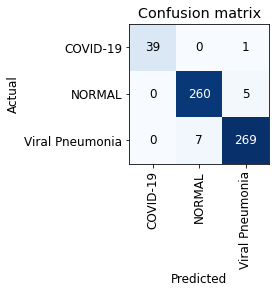

In [74]:
interp = ClassificationInterpretation.from_learner(learn)
interp.plot_confusion_matrix()

In [78]:
learn.predict(image_path/'COVID-19/COVID-19 (1).png')

('COVID-19', tensor(0), tensor([9.9993e-01, 1.3750e-12, 6.8816e-05]))

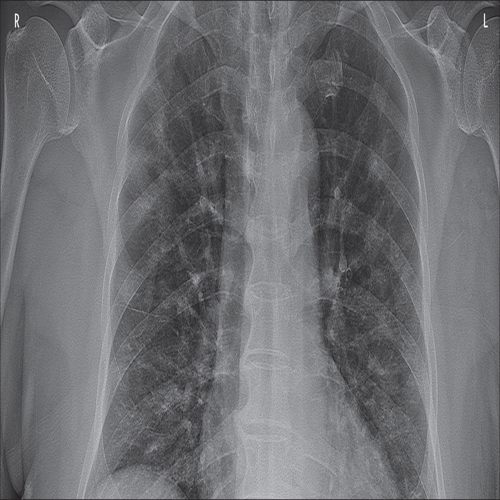

In [83]:
img = PILImage.create(image_path/'COVID-19/COVID-19 (1).png')
img.to_thumb(500)

Okay so you have this notebook, which you should also add some markdown stuff with
BUT the biggest thing is to turn this into an application with markdown information with examples of the actually classification it's doing, with a link to the kaggle page so that they can download a single file and test it out!

In [84]:
learn.export()

In [86]:
doc(learn.export)

In [87]:
learn.export('../../covid.pkl')

In [92]:
from fastai.vision.widgets import *

In [93]:
learn_inf = load_learner(image_path/'export.pkl', cpu=True)
btn_upload = widgets.FileUpload()
out_pl = widgets.Output()
lbl_pred = widgets.Label()

In [94]:
def on_data_change(change):
    lbl_pred.value = ''
    img = PILImage.create(btn_upload.data[-1])
    out_pl.clear_output()
    with out_pl: display(img.to_thumb(128,128))
    pred,pred_idx,probs = learn_inf.predict(img)
    lbl_pred.value = f'Prediction: {pred}; Probability: {probs[pred_idx]:.04f}'

In [95]:
btn_upload.observe(on_data_change, names=['data'])

In [96]:
display(VBox([widgets.Label('Select your radiography!'), btn_upload, out_pl, lbl_pred]))